# Data Exploration: California Housing Dataset

## Overview

This notebook explores the California Housing dataset, which we'll use to implement linear and logistic regression from scratch. The dataset contains information about housing districts in California from the 1990 census.

## Dataset Characteristics

- **Source**: StatLib repository (originally from 1990 US Census)
- **Task**: Regression (predicting median house value)
- **Samples**: ~20,640
- **Features**: 8 numerical features
- **Target**: Median house value (continuous, in hundreds of thousands of dollars)

## Why This Dataset?

1. **Well-understood problem**: Housing price prediction is intuitive and interpretable
2. **Tabular structure**: Perfect for linear models
3. **Real-world relevance**: Practical application with clear business value
4. **Feature diversity**: Mix of geographical, demographic, and structural features
5. **Size**: Large enough to demonstrate scalability, small enough for experimentation


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# Set style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Set random seed for reproducibility
np.random.seed(42)


In [2]:
# Load the California Housing dataset
housing = fetch_california_housing(as_frame=True)

# Extract features and target
X = housing.data
y = housing.target

print("Dataset shape:", X.shape)
print("\nFeature names:")
print(X.columns.tolist())
print("\nTarget description:")
print(housing.DESCR[:500])


Dataset shape: (20640, 8)

Feature names:
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

Target description:
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group popu


In [3]:
# Display first few rows
df = X.copy()
df['MedHouseVal'] = y
print("First 5 rows:")
print(df.head())
print("\nDataset info:")
print(df.info())
print("\nBasic statistics:")
print(df.describe())


First 5 rows:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-

In [4]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())
print("\nNo missing values found - dataset is clean!")


Missing values per column:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

No missing values found - dataset is clean!


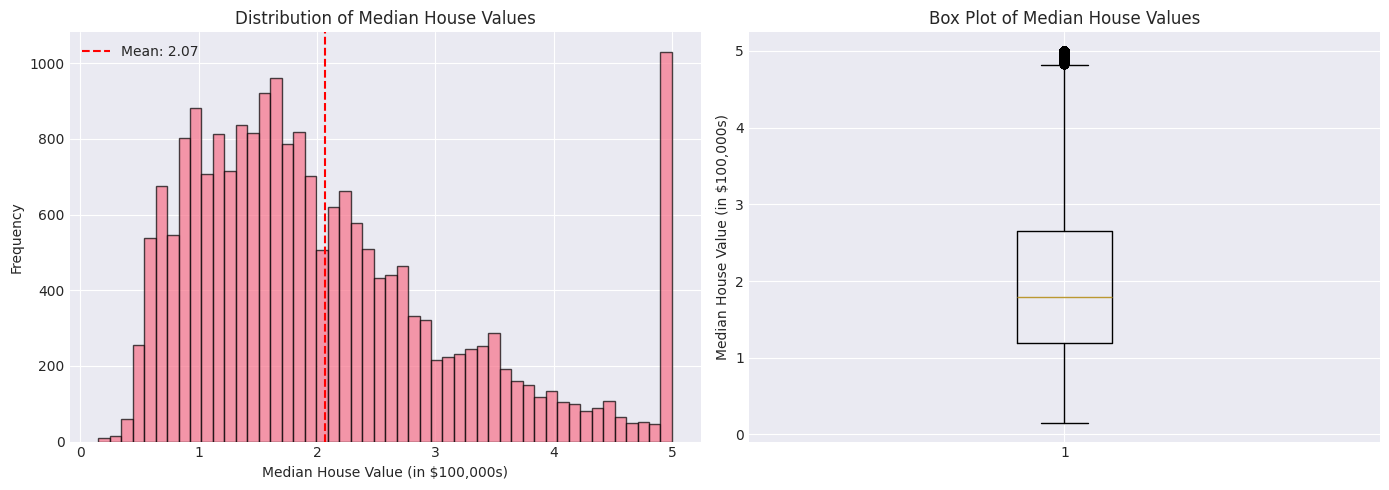

Target statistics:
Mean: 2.07
Median: 1.80
Std: 1.15
Min: 0.15
Max: 5.00


In [5]:
# Visualize target distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(y, bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Median House Value (in $100,000s)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Median House Values')
axes[0].axvline(y.mean(), color='red', linestyle='--', label=f'Mean: {y.mean():.2f}')
axes[0].legend()

# Box plot
axes[1].boxplot(y, vert=True)
axes[1].set_ylabel('Median House Value (in $100,000s)')
axes[1].set_title('Box Plot of Median House Values')

plt.tight_layout()
plt.show()

print(f"Target statistics:")
print(f"Mean: {y.mean():.2f}")
print(f"Median: {np.median(y):.2f}")
print(f"Std: {y.std():.2f}")
print(f"Min: {y.min():.2f}")
print(f"Max: {y.max():.2f}")


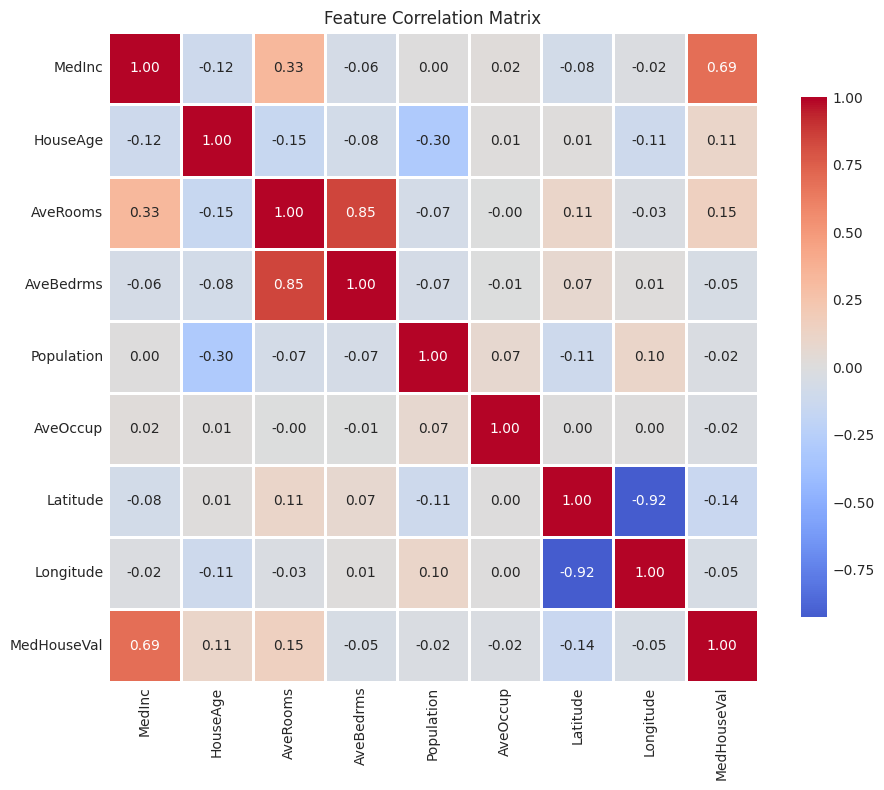


Correlations with Median House Value:
MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151948
HouseAge       0.105623
AveOccup      -0.023737
Population    -0.024650
Longitude     -0.045967
AveBedrms     -0.046701
Latitude      -0.144160
Name: MedHouseVal, dtype: float64


In [6]:
# Correlation matrix
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Show correlations with target
target_correlations = correlation_matrix['MedHouseVal'].sort_values(ascending=False)
print("\nCorrelations with Median House Value:")
print(target_correlations)


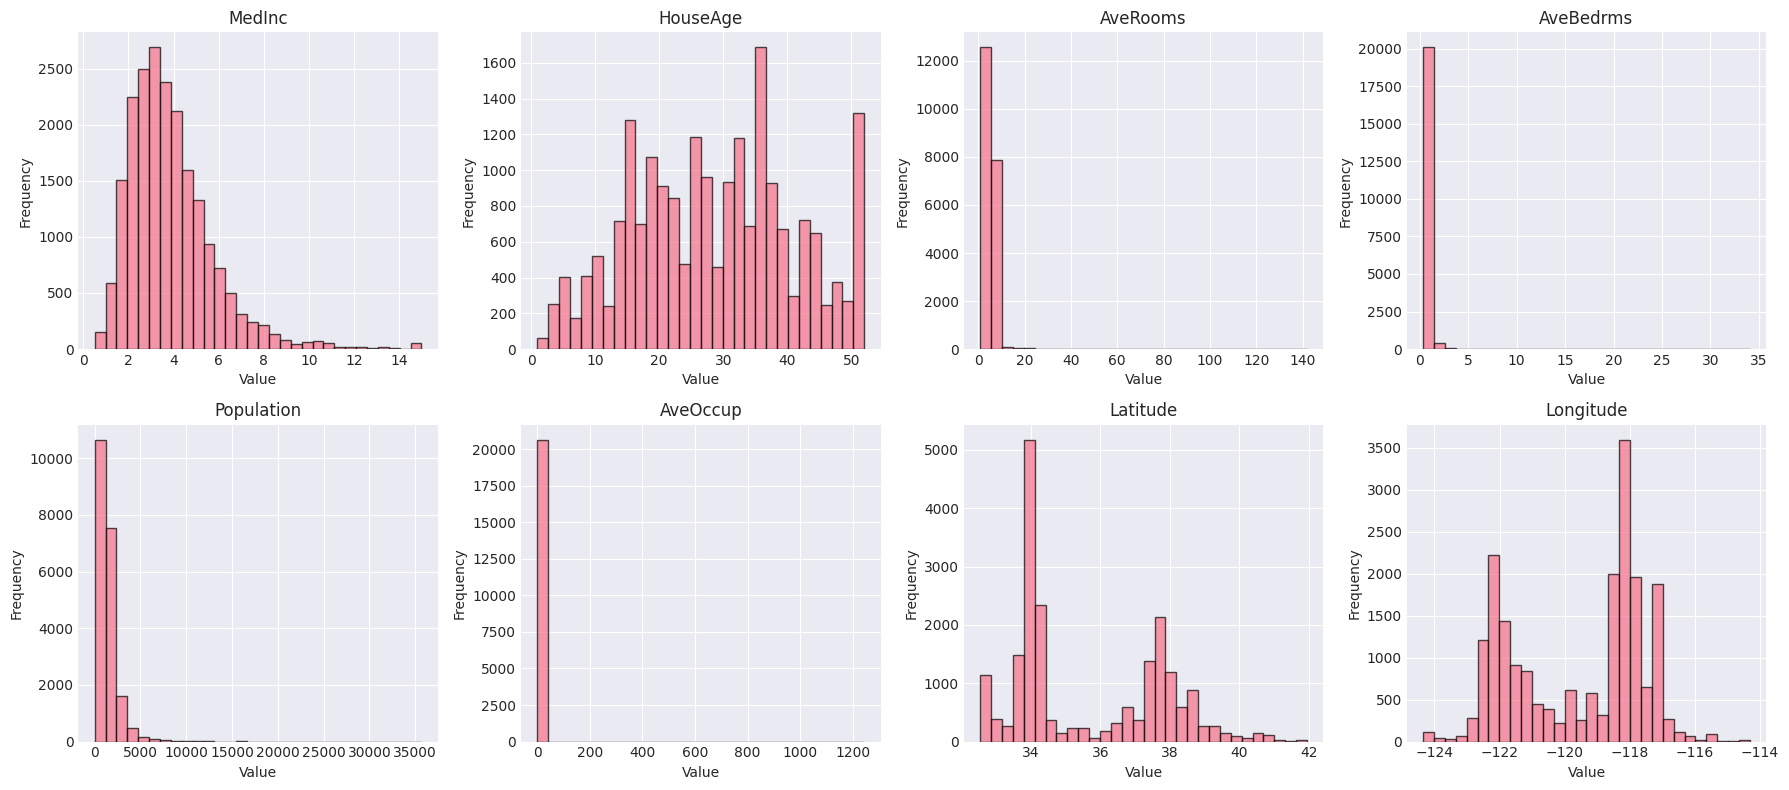

In [7]:
# Feature distributions
fig, axes = plt.subplots(2, 4, figsize=(18, 8))
axes = axes.flatten()

for idx, feature in enumerate(X.columns):
    axes[idx].hist(X[feature], bins=30, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{feature}')
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


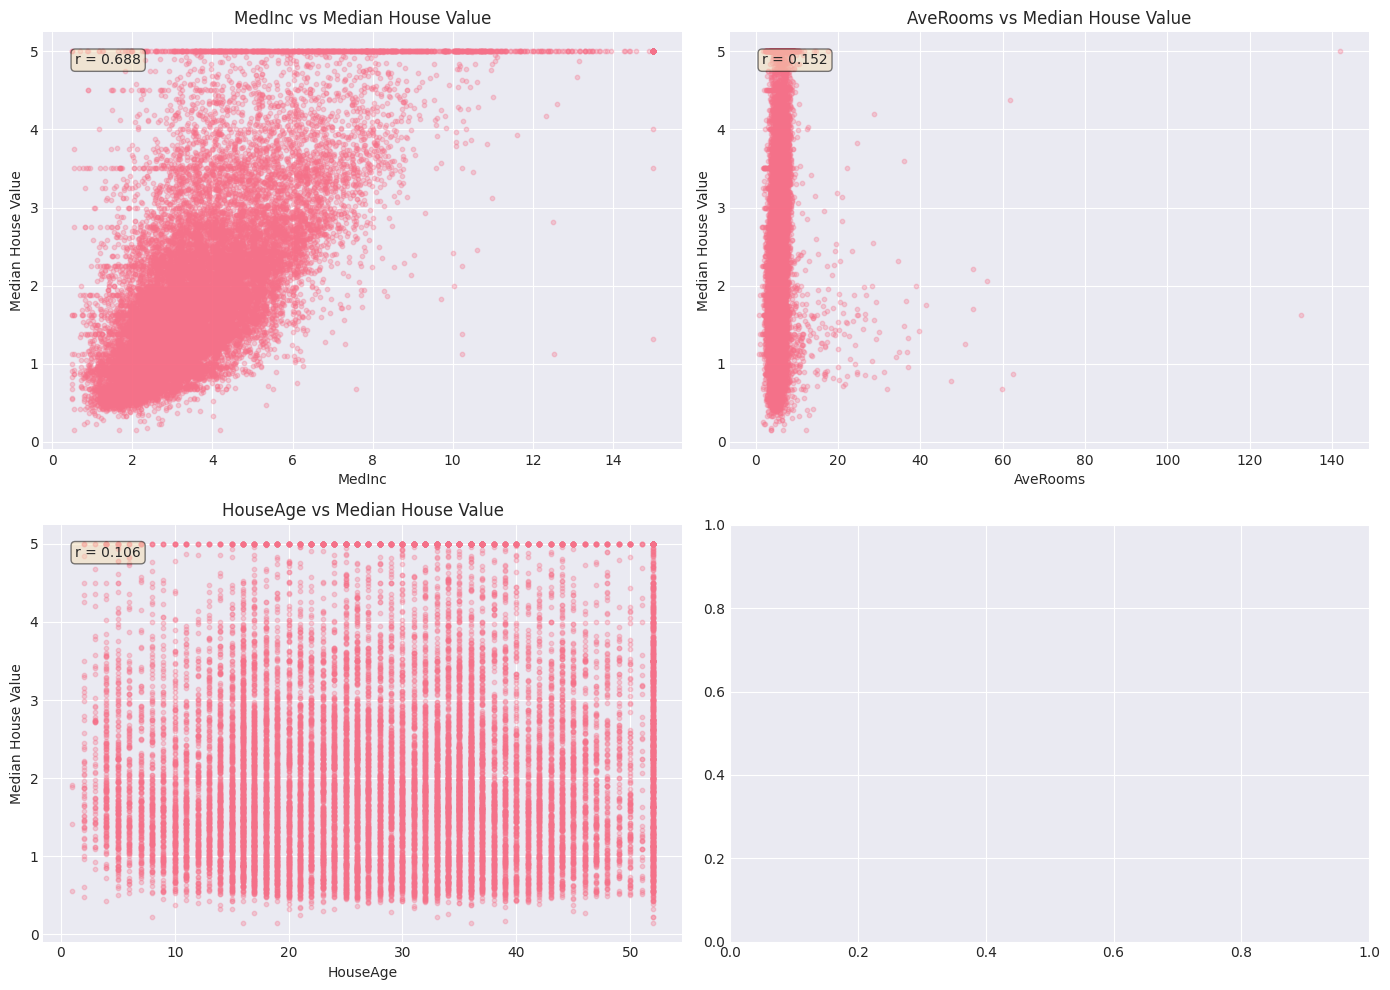

In [8]:
# Scatter plots of top features vs target
top_features = target_correlations.abs().head(4).index.tolist()
top_features = [f for f in top_features if f != 'MedHouseVal']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, feature in enumerate(top_features):
    axes[idx].scatter(X[feature], y, alpha=0.3, s=10)
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Median House Value')
    axes[idx].set_title(f'{feature} vs Median House Value')
    
    # Add correlation coefficient
    corr = np.corrcoef(X[feature], y)[0, 1]
    axes[idx].text(0.05, 0.95, f'r = {corr:.3f}', 
                   transform=axes[idx].transAxes, 
                   verticalalignment='top',
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()


In [9]:
# Prepare data for modeling
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X.values, y.values, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"Number of features: {X_train.shape[1]}")

# Save preprocessed data for use in other notebooks
import pickle

data_dict = {
    'X_train': X_train,
    'X_test': X_test,
    'y_train': y_train,
    'y_test': y_test,
    'feature_names': X.columns.tolist()
}

with open('../data_preprocessed.pkl', 'wb') as f:
    pickle.dump(data_dict, f)

print("\nPreprocessed data saved to '../data_preprocessed.pkl'")


Training set size: 16512
Test set size: 4128
Number of features: 8

Preprocessed data saved to '../data_preprocessed.pkl'
